<a href="https://colab.research.google.com/github/KhaldounN/BTS_MBDS_Sharepoint/blob/master/Session_3_Regularization_and_Poly_regression_EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 3: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_3/Session_3_Regularization_and_Poly_regression_EXERCISE.ipynb)

**Resources:**
* Auréliene Géron, Hands On ML with SKlearn, Keras and TF

# Regression with regularization

#### We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

This is the very same exercise that we did in class, try to go in depth into the tradeoffs of lambda (alpha) and others

### Import libraries and dataset from sklearn

In [51]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib 
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Lasso


boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add Noise to original dataset

In [38]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']


In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.701302,0.267674,0.708905,0.566250,0.770306
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.861544,0.501397,0.938214,0.399824,0.400048
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.467157,0.880126,0.098231,0.678109,0.599222
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.855163,0.661287,0.559548,0.288025,0.106453
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.376816,0.229935,0.078298,0.877130,0.610271


In [40]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) and describe how the scores of the features change

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# CREATE MODEL INSTANCES

LinearRegression = LinearRegression()

Lasso = Lasso()

Ridge = Ridge()

ElasticNet = ElasticNet()

##### NORMALIZE DATA USING THE ```StandardScaler``` PROVIDED BY sklearn

In [42]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [43]:
Models = [ LinearRegression , Lasso , Ridge , ElasticNet]

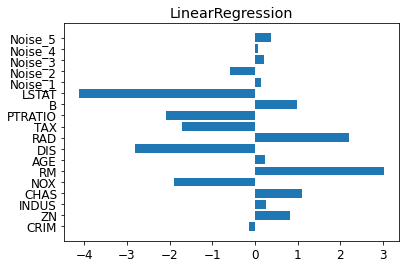

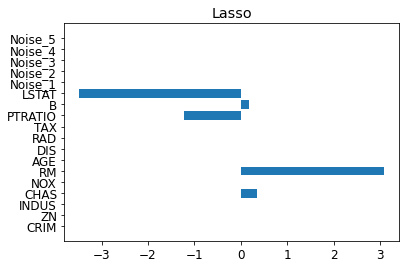

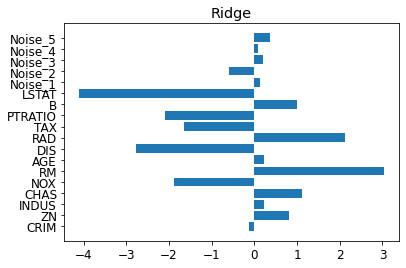

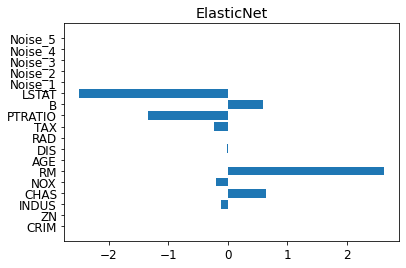

,Features,LinearRegression,Lasso,Ridge,ElasticNet
0,CRIM,-0.136675,-0.000000,-0.131101,-0.000000
1,ZN,0.823448,0.000000,0.807086,0.000000
2,INDUS,0.253327,-0.000000,0.228872,-0.112192
3,CHAS,1.107191,0.340719,1.109919,0.635905
4,NOX,-1.910408,-0.000000,-1.874543,-0.202282
5,RM,3.015680,3.075163,3.027605,2.618869
6,AGE,0.241992,-0.000000,0.229256,-0.000000
7,DIS,-2.803794,-0.000000,-2.773758,-0.014043
8,RAD,2.201335,-0.000000,2.123175,-0.000000
9,TAX,-1.717509,-0.000000,-1.647024,-0.224970


In [44]:
df = pd.DataFrame()

df['Features'] = X.columns
for idx , item  in enumerate(Models):
  ml = item.fit(X_train , y_train)
  plt.barh( X.columns , ml.coef_)
  plt.title(type(ml).__name__)
  plt.show()
  df[str(type(ml).__name__)] = ml.coef_


df

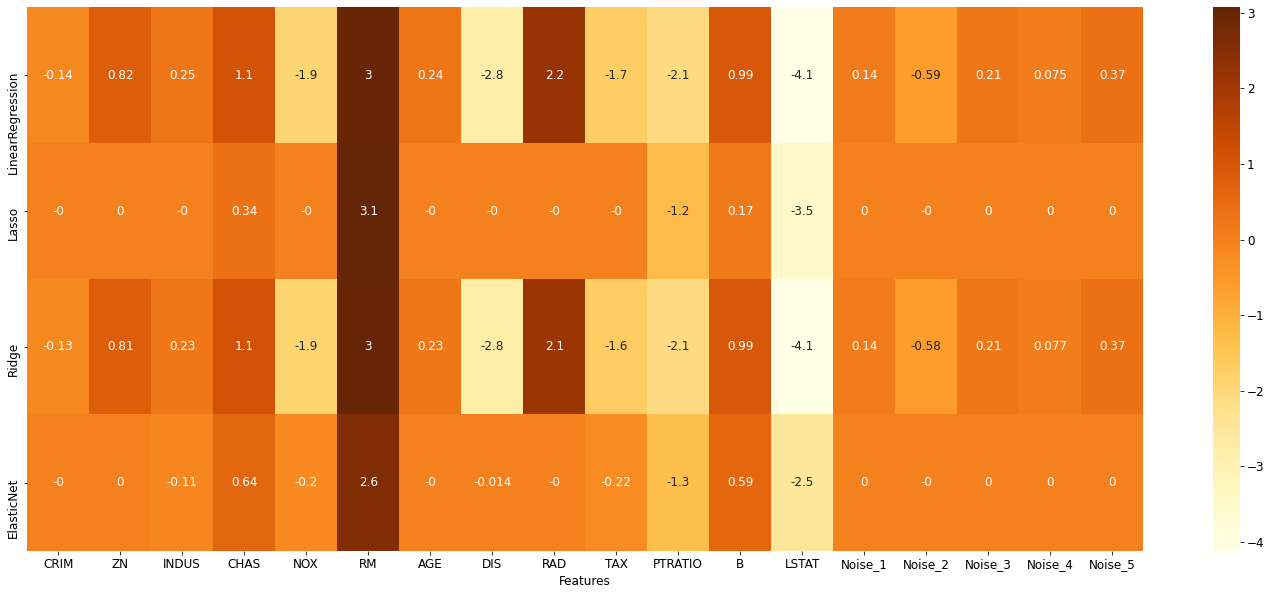

In [45]:
plt.figure(figsize=(25,10))
df.index = df['Features']
ax = sns.heatmap(df.loc[:, df.columns != 'Features'].T , annot=True , cmap="YlOrBr")
plt.show()


#### Decribe the results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Compute the Model Scores

In [46]:
for idx , item  in enumerate(Models):
  ml = item.fit(X_train , y_train)
  y_pred = ml.predict(X_test)
  print('Mean Square Error of ' , type(ml).__name__ ,":" , mean_squared_error(y_test, y_pred))

Mean Square Error of  LinearRegression : 24.95110137639309
Mean Square Error of  Lasso : 24.90961562396693
Mean Square Error of  Ridge : 24.938058105032688
Mean Square Error of  ElasticNet : 24.62601536775952


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

### Alpha parameter:  Apply Lasso with different values of alpha and describe how the parameters scores change


- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5491.562597739732, tolerance: 4.2716295415019765
  positive)


,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
Feature Name,,,,
CRIM,-0.928896,-0.928607,-0.115265,-0.0
ZN,1.096486,1.096035,0.000000,0.0
INDUS,0.160653,0.159702,-0.000000,-0.0
CHAS,0.711609,0.711604,0.397079,0.0
NOX,-1.980452,-1.979829,-0.000000,-0.0
RM,2.705679,2.705738,2.974259,0.0
AGE,-0.017636,-0.017438,-0.000000,-0.0
DIS,-3.079427,-3.078843,-0.170569,0.0
RAD,2.633857,2.632121,-0.000000,-0.0


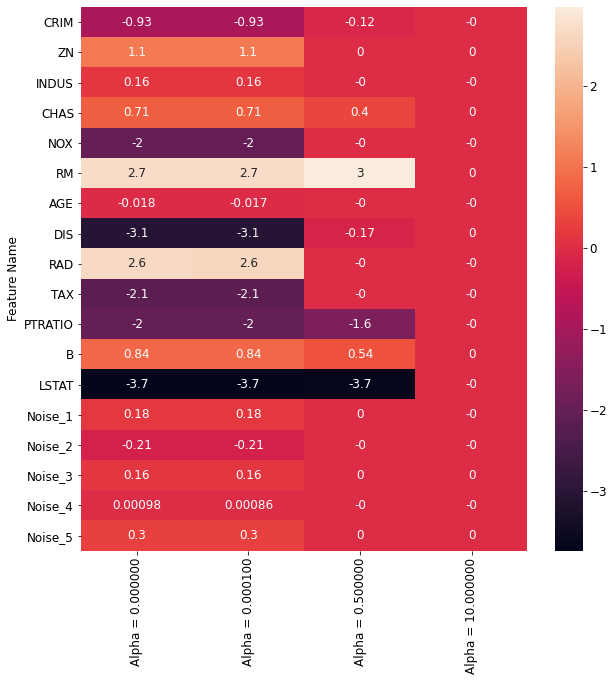

In [86]:
names = names = X.columns

alphas = [0, .0001, .5, 10]

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df1 = pd.DataFrame()
    
    # Create a column of feature names
    df1['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,

        # ********************************************************
        lasso = Lasso(alpha=alpha)
        # ********************************************************
        
        # Fit the lasso regression
        lasso.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        # Create a column of coefficient values
        df1[column_name] = lasso.coef_
        
    # Return the dataframe  
    return df1

df1 = lasso(alphas)


df1.index = df1['Feature Name']
df1 = df1.drop(columns='Feature Name')
plt.figure(figsize = (10,10))
sns.heatmap(df1 , annot=True)
df1

#### Describe the above results

####higher Alpha value causes smaller coefficients. high enough alpha parameters will squeeze all coefficients to zero

### Apply Ridge with different values of alpha and describe how the parameters scores change
- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
Feature Name,,,,
CRIM,-0.928896,-0.928895,-0.924755,-0.860606
ZN,1.096486,1.096485,1.088800,0.968820
INDUS,0.160653,0.160651,0.148667,-0.021924
CHAS,0.711609,0.711610,0.713312,0.737145
NOX,-1.980452,-1.980449,-1.966894,-1.743999
RM,2.705679,2.705680,2.709889,2.771709
AGE,-0.017636,-0.017636,-0.020627,-0.065607
DIS,-3.079427,-3.079424,-3.066146,-2.834194
RAD,2.633857,2.633850,2.597954,2.069228


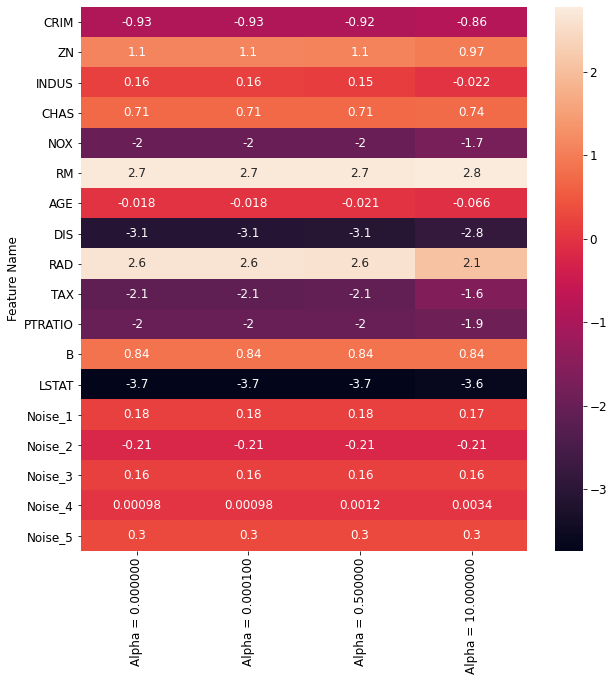

In [90]:
names = names = X.columns

# Create a function called ridge,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    # Create an empty data frame
    df2 = pd.DataFrame()
    
    # Create a column of feature names
    df2['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        
        #********************************************************
        ridge = Ridge(alpha=alpha)
        #********************************************************
        
        # Fit the lasso regression
        ridge.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df2[column_name] = ridge.coef_
        
    # Return the dataframe  
    return df2

df2 = ridge(alphas)


df2.index = df2['Feature Name']
df2 = df2.drop(columns='Feature Name')
plt.figure(figsize = (10,10))
sns.heatmap(df2 , annot=True)
df2

In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [91]:
from sklearn.linear_model import LassoCV

reg = LassoCV(max_iter = 5000, cv = 20, normalize=True).fit(X_train, y_train)
reg.alpha_


0.0033304967109759184

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5491.562597739732, tolerance: 4.2716295415019765
  positive)


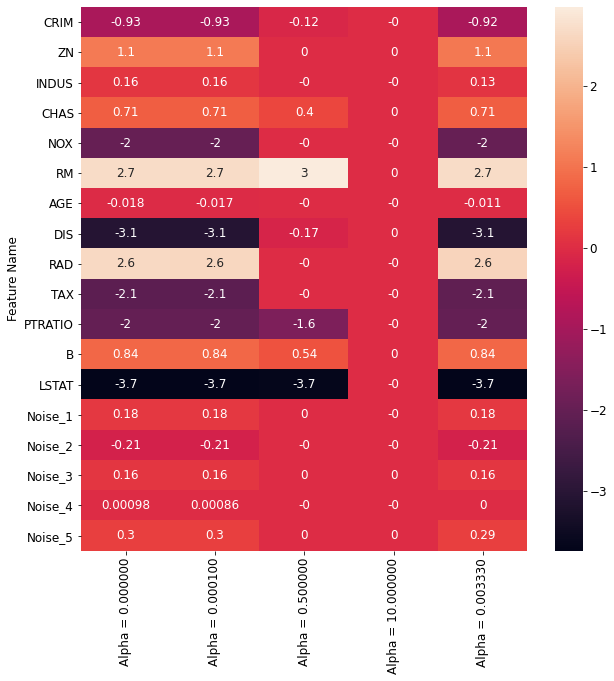

In [93]:
alphas = [0, .0001, .5, 10 , 0.0033304967109759184]
df1 = lasso(alphas)


df1.index = df1['Feature Name']
df1 = df1.drop(columns='Feature Name')
plt.figure(figsize = (10,10))
sns.heatmap(df1 , annot=True)

In [98]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV( cv = 20, normalize=True).fit(X_train, y_train)
reg.alpha_


0.1

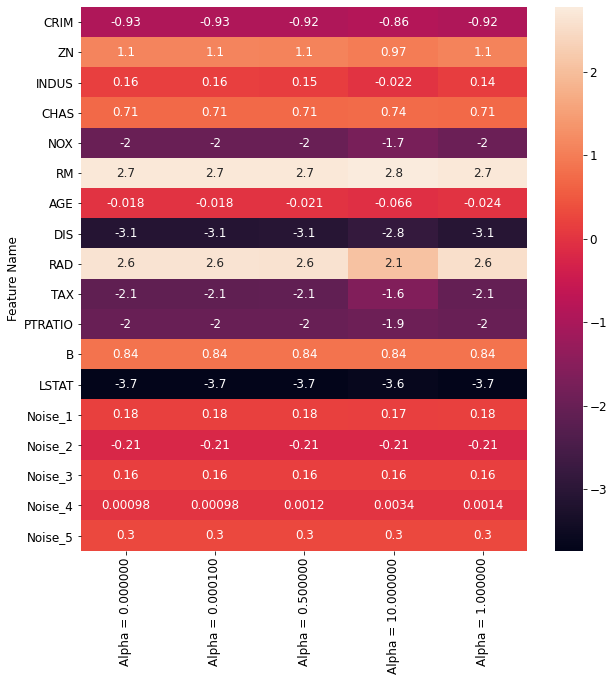

In [99]:
alphas = [0, .0001, .5, 10 , 1]
df1 = ridge(alphas)


df1.index = df1['Feature Name']
df1 = df1.drop(columns='Feature Name')
plt.figure(figsize = (10,10))
sns.heatmap(df1 , annot=True)